<div align="center">
<p align="center" style="width: 100%;">
    <img src="https://raw.githubusercontent.com/vlm-run/.github/refs/heads/main/profile/assets/vlm-black.svg" alt="VLM Run Logo" width="80" style="margin-bottom: -5px; color: #2e3138; vertical-align: middle; padding-right: 5px;"><br>
</p>
<p align="center"><a href="https://docs.vlm.run"><b>Website</b></a> | <a href="https://docs.vlm.run/"><b>API Docs</b></a> | <a href="https://docs.vlm.run/blog"><b>Blog</b></a> | <a href="https://discord.gg/AMApC2UzVY"><b>Discord</b></a>
</p>
<p align="center">
<a href="https://discord.gg/AMApC2UzVY"><img alt="Discord" src="https://img.shields.io/badge/discord-chat-purple?color=%235765F2&label=discord&logo=discord"></a>
<a href="https://twitter.com/vlmrun"><img alt="Twitter Follow" src="https://img.shields.io/twitter/follow/vlmrun.svg?style=social&logo=twitter"></a>
</p>
</div>

Welcome to **[VLM Run Cookbooks](https://github.com/vlm-run/vlmrun-cookbook)**, a comprehensive collection of examples and notebooks demonstrating the power of structured visual understanding using the [VLM Run Platform](https://app.vlm.run). 

## Case Study: Understanding Bank Statements

In this notebook, we'll walk through an example of understanding bank statement documents using VLM Run's specialized `document.bank-statement` domain

### Environment Setup

To get started, install the VLM Run Python SDK and sign-up for an API key on the [VLM Run App](https://app.vlm.run).
- Store the VLM Run API key under the `VLMRUN_API_KEY` environment variable.

## Prerequisites

* Python 3.9+
* VLM Run API key (get one at [app.vlm.run](https://app.vlm.run))

## Setup

First, let's install the required packages:

In [1]:
! pip install vlmrun --upgrade --quiet
! pip install vlmrun-hub --upgrade --quiet


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
! pip install requests tqdm matplotlib pandas --quiet


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [3]:
import os
import getpass

VLMRUN_BASE_URL = os.getenv("VLMRUN_BASE_URL", "https://api.vlm.run/v1")
VLMRUN_API_KEY = os.getenv("VLMRUN_API_KEY", None)
if VLMRUN_API_KEY is None:
    VLMRUN_API_KEY = getpass.getpass()

Let's initialize the VLM Run Client

In [4]:
from vlmrun.client import VLMRun

vlm_client = VLMRun(base_url=VLMRUN_BASE_URL, api_key=VLMRUN_API_KEY)

## Download Bank Statement PDFs

Let's download the example bank statement PDFs for analysis

In [5]:
import requests
from tqdm import tqdm
import os

def download_pdf(url, output_path):
    """Download a PDF file with progress bar"""
    response = requests.get(url, stream=True)
    
    # Check if the request was successful
    if response.status_code != 200:
        print(f"Failed to download {url}")
        return None
        
    # Get file size for progress bar
    total_size = int(response.headers.get('content-length', 0))
    
    # Setup progress bar
    progress_bar = tqdm(total=total_size, unit='B', unit_scale=True, desc=f"Downloading {os.path.basename(output_path)}")
    
    # Write to file
    with open(output_path, 'wb') as f:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                f.write(chunk)
                progress_bar.update(len(chunk))
    
    progress_bar.close()
    print(f"Downloaded {output_path}")
    return output_path

In [6]:
# Define our PDF URLs
pdf_urls = [
    "https://storage.googleapis.com/vlm-data-public-prod/hub/examples/document.bank-statement/lending_bankstatement.pdf",
    "https://storage.googleapis.com/vlm-data-public-prod/hub/examples/document.bank-statement/statement_sample1.pdf"
]

# Create output directory if it doesn't exist
os.makedirs("bank_statements", exist_ok=True)

# Download the PDFs
pdf_paths = []
for url in pdf_urls:
    filename = os.path.basename(url)
    output_path = os.path.join("bank_statements", filename)
    pdf_path = download_pdf(url, output_path)
    if pdf_path:
        pdf_paths.append(pdf_path)

Downloaded bank_statements/lending_bankstatement.pdf


Downloaded bank_statements/statement_sample1.pdf


## Upload and Analyze Bank Statements

Now let's upload the PDFs to VLM Run and analyze them using the `document.bank-statement` domain.

In [7]:
from IPython.display import display, HTML
import pandas as pd
import json

# Upload and analyze each PDF
results = []

for pdf_path in pdf_paths:
    print(f"Processing {pdf_path}...")
    
    # Upload the file
    uploaded_file = vlm_client.files.upload(file=pdf_path)
    
    print(f"File uploaded with ID: {uploaded_file.id}")
    
    # Generate predictions using the document.bank-statement domain
    prediction = vlm_client.document.generate(
        file=uploaded_file.id,
        model="vlm-1",
        domain="document.bank-statement"
    )
    
    # Store results
    results.append({
        "file_name": os.path.basename(pdf_path),
        "file_id": uploaded_file.id,
        "prediction": prediction
    })
    
    print(f"Analysis complete for {pdf_path}\n")

2025-04-16 20:04:34.848 | DEBUG    | vlmrun.client.files:get_cached_file:56 - Computing md5 hash for file [file=bank_statements/lending_bankstatement.pdf]
2025-04-16 20:04:34.850 | DEBUG    | vlmrun.client.files:get_cached_file:62 - Computed md5 hash for file [file=bank_statements/lending_bankstatement.pdf, hash=16917727c3392b74ce375ce24b1d9234]
2025-04-16 20:04:34.850 | DEBUG    | vlmrun.client.files:get_cached_file:65 - Checking if file exists in the database [file=bank_statements/lending_bankstatement.pdf, hash=16917727c3392b74ce375ce24b1d9234]


Processing bank_statements/lending_bankstatement.pdf...


2025-04-16 20:04:36.307 | DEBUG    | vlmrun.client.predictions:_handle_file_or_url:377 - Using file_id [file_id=ad07f91e-07bd-45fa-bfe2-c13b7eb7dba7]


File uploaded with ID: ad07f91e-07bd-45fa-bfe2-c13b7eb7dba7


2025-04-16 20:05:13.805 | DEBUG    | vlmrun.client.files:get_cached_file:56 - Computing md5 hash for file [file=bank_statements/statement_sample1.pdf]
2025-04-16 20:05:13.808 | DEBUG    | vlmrun.client.files:get_cached_file:62 - Computed md5 hash for file [file=bank_statements/statement_sample1.pdf, hash=5d73628bbc55be7a97b165793ff89a29]
2025-04-16 20:05:13.809 | DEBUG    | vlmrun.client.files:get_cached_file:65 - Checking if file exists in the database [file=bank_statements/statement_sample1.pdf, hash=5d73628bbc55be7a97b165793ff89a29]


Analysis complete for bank_statements/lending_bankstatement.pdf

Processing bank_statements/statement_sample1.pdf...


2025-04-16 20:05:15.383 | DEBUG    | vlmrun.client.predictions:_handle_file_or_url:377 - Using file_id [file_id=e418d20a-3bc6-4579-a024-fee2586b54d6]


File uploaded with ID: e418d20a-3bc6-4579-a024-fee2586b54d6
Analysis complete for bank_statements/statement_sample1.pdf



## Display Analysis Results

Let's create a nice visualization for our bank statement analysis

In [8]:
def display_bank_statement_analysis(result):
    """Create a visual HTML display of bank statement analysis"""
    file_name = result["file_name"]
    file_id = result["file_id"]
    data = result["prediction"]
    response = data.response
    
    # Create HTML display
    html = f"""
    <div style="border: 1px solid #ddd; padding: 15px; margin: 20px 0; border-radius: 8px; background-color: #f8f9fa;">
        <h2 style="color: #2c3e50; border-bottom: 1px solid #eee; padding-bottom: 10px;">Bank Statement Analysis: {file_name}</h2>
        <p><strong>File ID:</strong> {file_id}</p>
        
        <div style="margin-top: 20px;">
            <h3 style="color: #2c3e50;">Account Information</h3>
            <table style="width: 100%; border-collapse: collapse; margin-top: 10px;">
                <tr style="background-color: #e9ecef;">
                    <th style="padding: 10px; text-align: left; border: 1px solid #dee2e6;">Field</th>
                    <th style="padding: 10px; text-align: left; border: 1px solid #dee2e6;">Value</th>
                </tr>
    """
    
    # Account details fields to display
    account_fields = [
        ("client_name", "Client Name"),
        ("account_number", "Account Number"),
        ("account_type", "Account Type"),
        ("bank_name", "Bank Name"),
        ("statement_date", "Statement Date"),
        ("statement_start_date", "Statement Start Date"),
        ("statement_end_date", "Statement End Date"),
        ("starting_balance", "Starting Balance"),
        ("ending_balance", "Ending Balance")
    ]
    
    # Add account details
    for field_key, field_label in account_fields:
        if field_key in response:
            html += f"""<tr>
                <td style="padding: 10px; border: 1px solid #dee2e6;">{field_label}</td>
                <td style="padding: 10px; border: 1px solid #dee2e6;">{response.get(field_key, 'N/A')}</td>
            </tr>"""
    
    # Add address if available
    if "client_address" in response:
        address = response["client_address"]
        address_str = f"{address.get('street', '')}, {address.get('city', '')}, {address.get('state', '')} {address.get('zip_code', '')}"
        html += f"""<tr>
            <td style="padding: 10px; border: 1px solid #dee2e6;">Client Address</td>
            <td style="padding: 10px; border: 1px solid #dee2e6;">{address_str}</td>
        </tr>"""
        
    html += """</table>
        </div>
    """
    
    # Add transactions if available
    if "table_item" in response and response["table_item"]:
        html += f"""
        <div style="margin-top: 30px;">
            <h3 style="color: #2c3e50;">Transactions</h3>
            <div style="max-height: 400px; overflow-y: auto;">
                <table style="width: 100%; border-collapse: collapse; margin-top: 10px;">
                    <tr style="background-color: #e9ecef;">
                        <th style="padding: 10px; text-align: left; border: 1px solid #dee2e6;">Date</th>
                        <th style="padding: 10px; text-align: left; border: 1px solid #dee2e6;">Description</th>
                        <th style="padding: 10px; text-align: right; border: 1px solid #dee2e6;">Amount</th>
                        <th style="padding: 10px; text-align: right; border: 1px solid #dee2e6;">Type</th>
                    </tr>
        """
        
        for transaction in response["table_item"]:
            # First check for deposit
            if transaction.get("transaction_deposit") is not None:
                date = transaction.get("transaction_deposit_date", "N/A")
                description = transaction.get("transaction_deposit_description", "N/A")
                amount = transaction.get("transaction_deposit", "N/A")
                txn_type = "Credit"
                row_color = "#d4edda"  # Green for deposits
            # Then check for withdrawal
            elif transaction.get("transaction_withdrawal") is not None:
                date = transaction.get("transaction_withdrawal_date", "N/A")
                description = transaction.get("transaction_withdrawal_description", "N/A")
                amount = transaction.get("transaction_withdrawal", "N/A")
                txn_type = "Debit"
                row_color = "#f8d7da"  # Red for withdrawals
            else:
                continue  # Skip if neither deposit nor withdrawal
            
            html += f"""
            <tr style="background-color: {row_color};">
                <td style="padding: 8px; border: 1px solid #dee2e6;">{date}</td>
                <td style="padding: 8px; border: 1px solid #dee2e6;">{description}</td>
                <td style="padding: 8px; text-align: right; border: 1px solid #dee2e6;">${amount}</td>
                <td style="padding: 8px; text-align: right; border: 1px solid #dee2e6;">{txn_type}</td>
            </tr>
            """
            
        html += """</table>
            </div>
        </div>"""
    
    # Add additional information section
    html += """
        <div style="margin-top: 30px;">
            <h3 style="color: #2c3e50;">Raw Analysis Data</h3>
            <pre style="background-color: #f5f5f5; padding: 15px; border-radius: 5px; overflow-x: auto;">"""
    
    # Add the raw JSON data for reference
    html += json.dumps(data.model_dump(mode="json"), indent=2)
    
    html += """</pre>
        </div>
    </div>
    """
    
    display(HTML(html))

In [9]:
# Display the analysis results for each PDF
for result in results:
    display_bank_statement_analysis(result)

Field,Value
Client Name,"Rachael Dean, Calvin Carrillo"
Account Number,1130864562578
Account Type,Essential Checking
Bank Name,Wells Fargo Bank
Statement Date,2019-08-09
Statement Start Date,2019-07-11
Statement End Date,2019-08-09
Starting Balance,13216.58
Ending Balance,4863.69
Client Address,"2 King Fork Rd., Indianapolis, IN 46201"


Field,Value
Client Name,Jane Customer
Account Number,000009752
Account Type,Checking
Bank Name,Commerce Bank
Statement Date,2003-06-05
Statement Start Date,None
Statement End Date,2003-06-05
Starting Balance,7126.11
Ending Balance,10521.19
Client Address,"1234 Anywhere Dr., Small Town, MO 12345-6789"


## Visualizing Transaction Data

Let's create some visualizations of the transaction data

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

def create_transaction_visualizations(results):
    for i, result in enumerate(results):
        file_name = result["file_name"]
        data = result["prediction"]
        response = data.response
        
        if "table_item" not in response or not response["table_item"]:
            print(f"No transaction data available for {file_name}")
            continue
        
        # Create a DataFrame with the reformatted transaction data
        transactions = []
        
        for item in response["table_item"]:
            # Handle deposits
            if item.get("transaction_deposit") is not None:
                transactions.append({
                    "date": item.get("transaction_deposit_date"),
                    "description": item.get("transaction_deposit_description"),
                    "amount": item.get("transaction_deposit"),
                    "type": "Credit"
                })
            
            # Handle withdrawals
            if item.get("transaction_withdrawal") is not None:
                transactions.append({
                    "date": item.get("transaction_withdrawal_date"),
                    "description": item.get("transaction_withdrawal_description"),
                    "amount": item.get("transaction_withdrawal"),
                    "type": "Debit"
                })
        
        # Convert to DataFrame
        df = pd.DataFrame(transactions)
        
        if df.empty:
            print(f"No valid transactions found for {file_name}")
            continue
        
        # Create figures
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        fig.suptitle(f"Transaction Analysis for {file_name}", fontsize=16)
        
        # Plot 1: Transaction Types
        transaction_types = df['type'].value_counts()
        transaction_types.plot(kind='pie', ax=axes[0], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
        axes[0].set_title('Transaction Types')
        axes[0].set_ylabel('')
        
        # Plot 2: Transaction Amounts
        debits = df[df['type'] == 'Debit']['amount']
        credits = df[df['type'] == 'Credit']['amount']
        
        debits_sum = debits.sum() if not debits.empty else 0
        credits_sum = credits.sum() if not credits.empty else 0
        
        axes[1].bar(['Debits', 'Credits'], [debits_sum, credits_sum], color=['#ff9999','#66b3ff'])
        axes[1].set_title('Total Transaction Amounts')
        axes[1].set_ylabel('Amount ($)')
        
        # Add dollar amounts on top of bars
        for j, v in enumerate([debits_sum, credits_sum]):
            axes[1].text(j, v + (v * 0.05), f'${v:.2f}', ha='center')
        
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()
        
        # Summary statistics
        print(f"\nTransaction Summary for {file_name}:")
        print(f"Total Transactions: {len(df)}")
        print(f"Total Debits: ${debits_sum:.2f}")
        print(f"Total Credits: ${credits_sum:.2f}")
        print(f"Net Change: ${credits_sum - debits_sum:.2f}")
        
        avg_transaction = df['amount'].mean() if not df.empty else 0
        print(f"Average Transaction: ${avg_transaction:.2f}")
        print("\n" + "-"*50)

No transaction data available for lending_bankstatement.pdf


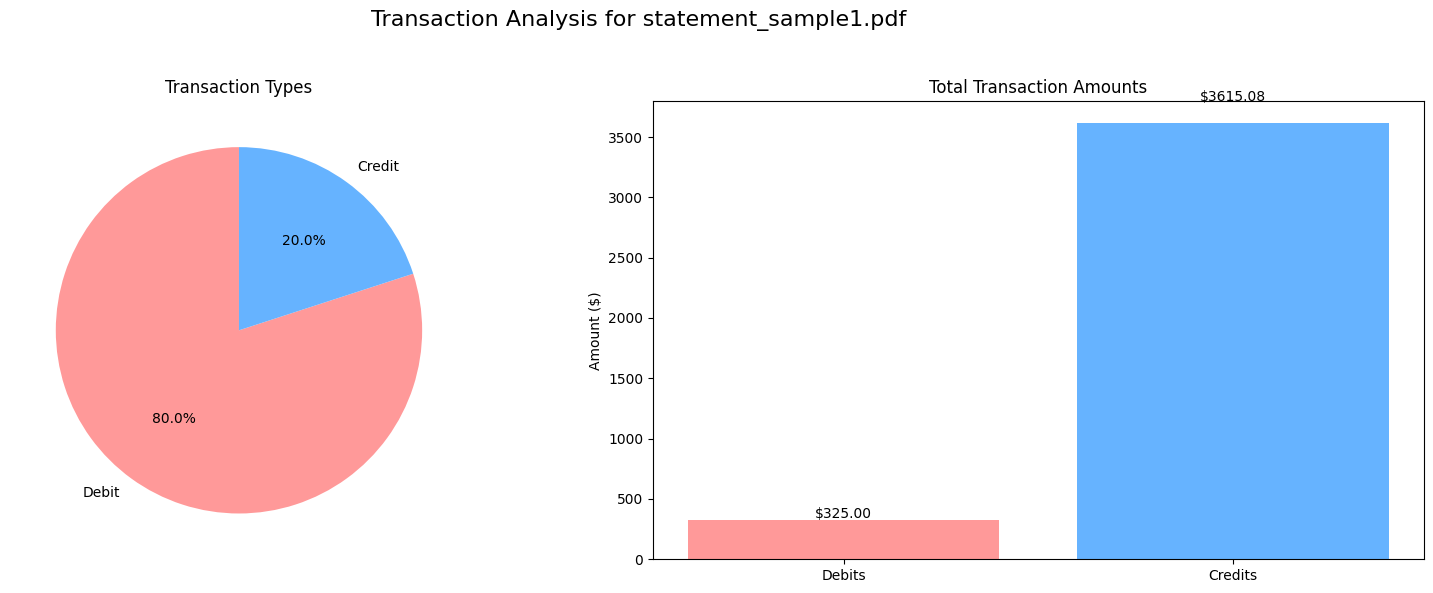


Transaction Summary for statement_sample1.pdf:
Total Transactions: 5
Total Debits: $325.00
Total Credits: $3615.08
Net Change: $3290.08
Average Transaction: $788.02

--------------------------------------------------


In [11]:
# Create visualizations for all bank statements
create_transaction_visualizations(results)

## Additional Resources
- [VLM Run Documentation](https://docs.vlm.run)
- [API Reference](https://docs.vlm.run/)
- [More Examples](https://github.com/vlm-run/vlmrun-cookbook)